# Importing the libraries

In [251]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import regex as re

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

Reading the Scrapped Data csv file into pandas dataframe

In [252]:
df=pd.read_csv('flight_scrap_data.csv')
df

,Airline,Date,Flight_Duration,Stops,Time_total,class_type,Flight_price
0,Spirit Airlines,2023-12-01,12h 44mBOS-ORD,1 stop,9:44 pm – 9:28 am+1,Economy,$82
1,American Airlines,2023-12-01,2h 48mBOS-ORD,nonstop,6:52 am – 8:40 am,Basic Economy,$89
2,Spirit Airlines,2023-12-01,12h 44mBOS-ORD,1 stop,9:44 pm – 9:28 am+1,Economy,$82
3,JetBlue,2023-12-01,3h 01mBOS-ORD,nonstop,4:54 pm – 6:55 pm,Blue Basic,$109
4,United Airlines,2023-12-01,2h 57mBOS-ORD,nonstop,6:00 am – 7:57 am,Basic Economy,$106
...,...,...,...,...,...,...,...
2280,American Airlines,2023-12-30,3h 20mDFW-EWR,nonstop,7:09 pm – 11:29 pm,Main Cabin,$378
2281,American Airlines,2023-12-30,3h 17mDFW-EWR,nonstop,11:34 am – 3:51 pm,Main Cabin,$378
2282,American Airlines,2023-12-30,3h 31mDFW-JFK,nonstop,5:10 pm – 9:41 pm,Main Cabin,$374
2283,United Airlines,2023-12-30,3h 28mDFW-EWR,nonstop,1:00 pm – 5:28 pm,Economy,$375


Looking at the inital dataframe, the features Flight_Duration, Stops, Time_total,Flight_price etc. needs to be cleaned to extract some new features and remove some errors in the dataframe,which is the next step cleaning the data

# Data Cleaning

splitting the date column to separate the year, month, day etc.

In [253]:
df['Date'] = pd.to_datetime(df['Date'])

In [254]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

extracting a new feature from flight_duration to change the flight_duration into minutes

In [255]:
df['Flight_Duration_minutes'] = df['Flight_Duration'].str.extract(r'(\d+)h (\d+)m').astype(int).apply(lambda x: x[0] * 60 + x[1], axis=1)

extracting the departure & arrival city from the flight duration separated by the '-'  

In [256]:
df['departure'] = df['Flight_Duration'].apply(lambda x: re.search(r'([A-Z]{3})-[A-Z]{3}', x).group(1))
df['arrival'] = df['Flight_Duration'].apply(lambda x: re.search(r'[A-Z]{3}-([A-Z]{3})', x).group(1))

In [257]:
df['departure'] # Boston-Bos, DALLAS-DFW,DAL, SFO- Sanfransisco, chicago-ORD,MDW, Newyork-NYC-JFK,LGA,EWR 

0       BOS
1       BOS
2       BOS
3       BOS
4       BOS
       ... 
2280    DFW
2281    DFW
2282    DFW
2283    DFW
2284    DFW
Name: departure, Length: 2285, dtype: object

Removing the $ symbol in the flight_price and storing only the price value in new column called price, using regular expressions to find only the digits

In [258]:
df['price'] = df['Flight_price'].apply(lambda x: re.search(r'\d+', x).group())

changing the values in Stops column, 1 if the value is 1 stop , 0 for non stop

In [259]:
df['Stops']=df['Stops'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

extracting the departure time and arrival time separated by '-' from time_total column

In [260]:
df[['departure_time', 'arrival_time']] = df['Time_total'].str.split(' – ', expand=True)

In [261]:
df

,Airline,Date,Flight_Duration,Stops,Time_total,class_type,Flight_price,Day,Month,Year,Flight_Duration_minutes,departure,arrival,price,departure_time,arrival_time
0,Spirit Airlines,2023-12-01,12h 44mBOS-ORD,1,9:44 pm – 9:28 am+1,Economy,$82,1,12,2023,764,BOS,ORD,82,9:44 pm,9:28 am+1
1,American Airlines,2023-12-01,2h 48mBOS-ORD,0,6:52 am – 8:40 am,Basic Economy,$89,1,12,2023,168,BOS,ORD,89,6:52 am,8:40 am
2,Spirit Airlines,2023-12-01,12h 44mBOS-ORD,1,9:44 pm – 9:28 am+1,Economy,$82,1,12,2023,764,BOS,ORD,82,9:44 pm,9:28 am+1
3,JetBlue,2023-12-01,3h 01mBOS-ORD,0,4:54 pm – 6:55 pm,Blue Basic,$109,1,12,2023,181,BOS,ORD,109,4:54 pm,6:55 pm
4,United Airlines,2023-12-01,2h 57mBOS-ORD,0,6:00 am – 7:57 am,Basic Economy,$106,1,12,2023,177,BOS,ORD,106,6:00 am,7:57 am
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,American Airlines,2023-12-30,3h 20mDFW-EWR,0,7:09 pm – 11:29 pm,Main Cabin,$378,30,12,2023,200,DFW,EWR,378,7:09 pm,11:29 pm
2281,American Airlines,2023-12-30,3h 17mDFW-EWR,0,11:34 am – 3:51 pm,Main Cabin,$378,30,12,2023,197,DFW,EWR,378,11:34 am,3:51 pm
2282,American Airlines,2023-12-30,3h 31mDFW-JFK,0,5:10 pm – 9:41 pm,Main Cabin,$374,30,12,2023,211,DFW,JFK,374,5:10 pm,9:41 pm
2283,United Airlines,2023-12-30,3h 28mDFW-EWR,0,1:00 pm – 5:28 pm,Economy,$375,30,12,2023,208,DFW,EWR,375,1:00 pm,5:28 pm


Deleting the uncleaned columns 

In [262]:
del df['Date']
del df['Flight_Duration']
del df['Time_total']
del df['Flight_price']
del df['departure_time']
del df['arrival_time']

Data View after the cleaning operations 

In [263]:
df

,Airline,Stops,class_type,Day,Month,Year,Flight_Duration_minutes,departure,arrival,price
0,Spirit Airlines,1,Economy,1,12,2023,764,BOS,ORD,82
1,American Airlines,0,Basic Economy,1,12,2023,168,BOS,ORD,89
2,Spirit Airlines,1,Economy,1,12,2023,764,BOS,ORD,82
3,JetBlue,0,Blue Basic,1,12,2023,181,BOS,ORD,109
4,United Airlines,0,Basic Economy,1,12,2023,177,BOS,ORD,106
...,...,...,...,...,...,...,...,...,...,...
2280,American Airlines,0,Main Cabin,30,12,2023,200,DFW,EWR,378
2281,American Airlines,0,Main Cabin,30,12,2023,197,DFW,EWR,378
2282,American Airlines,0,Main Cabin,30,12,2023,211,DFW,JFK,374
2283,United Airlines,0,Economy,30,12,2023,208,DFW,EWR,375


# Exploring the Data

knowing about the columns 

In [264]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2285 entries, 0 to 2284
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airline                  2285 non-null   object
 1   Stops                    2285 non-null   int64 
 2   class_type               2285 non-null   object
 3   Day                      2285 non-null   int64 
 4   Month                    2285 non-null   int64 
 5   Year                     2285 non-null   int64 
 6   Flight_Duration_minutes  2285 non-null   int64 
 7   departure                2285 non-null   object
 8   arrival                  2285 non-null   object
 9   price                    2285 non-null   object
dtypes: int64(5), object(5)
memory usage: 178.6+ KB


getting the statistics for numerical features

In [265]:
df.describe()  

,Stops,Day,Month,Year,Flight_Duration_minutes
count,2285.000000,2285.000000,2285.0,2285.0,2285.000000
mean,0.200875,15.294092,12.0,2023.0,314.440263
std,0.417858,8.669207,0.0,0.0,194.287018
min,0.000000,1.000000,12.0,2023.0,168.000000
25%,0.000000,8.000000,12.0,2023.0,207.000000
50%,0.000000,16.000000,12.0,2023.0,284.000000
75%,0.000000,23.000000,12.0,2023.0,337.000000
max,3.000000,30.000000,12.0,2023.0,2570.000000


number of unique values in each feature

In [266]:
df.nunique() 

Airline                     11
Stops                        4
class_type                   6
Day                         30
Month                        1
Year                         1
Flight_Duration_minutes    277
departure                    9
arrival                      8
price                      280
dtype: int64

 check for null values in the dataframe

In [267]:
df.isnull().sum() 

Airline                    0
Stops                      0
class_type                 0
Day                        0
Month                      0
Year                       0
Flight_Duration_minutes    0
departure                  0
arrival                    0
price                      0
dtype: int64

checking for the number of Duplicate values in the dataframe

In [268]:
df.duplicated().sum()

228

viewing the duplicate values in the dataframe

In [269]:
df[df.duplicated()]

,Airline,Stops,class_type,Day,Month,Year,Flight_Duration_minutes,departure,arrival,price
2,Spirit Airlines,1,Economy,1,12,2023,764,BOS,ORD,82
19,Spirit Airlines,1,Economy,2,12,2023,764,BOS,ORD,82
24,United Airlines,0,Basic Economy,2,12,2023,177,BOS,ORD,89
26,United Airlines,0,Basic Economy,2,12,2023,177,BOS,ORD,89
27,United Airlines,0,Basic Economy,2,12,2023,177,BOS,ORD,89
...,...,...,...,...,...,...,...,...,...,...
2098,Spirit Airlines,0,Economy,19,12,2023,205,DFW,EWR,63
2131,Spirit Airlines,1,Economy,21,12,2023,754,DFW,LGA,85
2155,American Airlines,0,Main Cabin,22,12,2023,200,DFW,EWR,289
2173,American Airlines,0,Main Cabin,23,12,2023,200,DFW,EWR,289


Dropping the duplicate values from the data

In [270]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [271]:
df

,Airline,Stops,class_type,Day,Month,Year,Flight_Duration_minutes,departure,arrival,price
0,Spirit Airlines,1,Economy,1,12,2023,764,BOS,ORD,82
1,American Airlines,0,Basic Economy,1,12,2023,168,BOS,ORD,89
2,JetBlue,0,Blue Basic,1,12,2023,181,BOS,ORD,109
3,United Airlines,0,Basic Economy,1,12,2023,177,BOS,ORD,106
4,JetBlue,0,Blue Basic,1,12,2023,180,BOS,ORD,119
...,...,...,...,...,...,...,...,...,...,...
2052,American Airlines,0,Main Cabin,30,12,2023,200,DFW,EWR,378
2053,American Airlines,0,Main Cabin,30,12,2023,197,DFW,EWR,378
2054,American Airlines,0,Main Cabin,30,12,2023,211,DFW,JFK,374
2055,United Airlines,0,Economy,30,12,2023,208,DFW,EWR,375


In [272]:
df.shape #dimensions of the data after deleting the duplicates

(2057, 10)

In [273]:
df=df.astype({'price':int}) # changing the price feature into int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Airline                  2057 non-null   object
 1   Stops                    2057 non-null   int64 
 2   class_type               2057 non-null   object
 3   Day                      2057 non-null   int64 
 4   Month                    2057 non-null   int64 
 5   Year                     2057 non-null   int64 
 6   Flight_Duration_minutes  2057 non-null   int64 
 7   departure                2057 non-null   object
 8   arrival                  2057 non-null   object
 9   price                    2057 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 160.8+ KB


# Data Visualization

Average fare of each airline , here sun country airlines have an average fare of 300 dollars & frontier being the cheaper 100 dollars 

<Axes: xlabel='price', ylabel='Airline'>

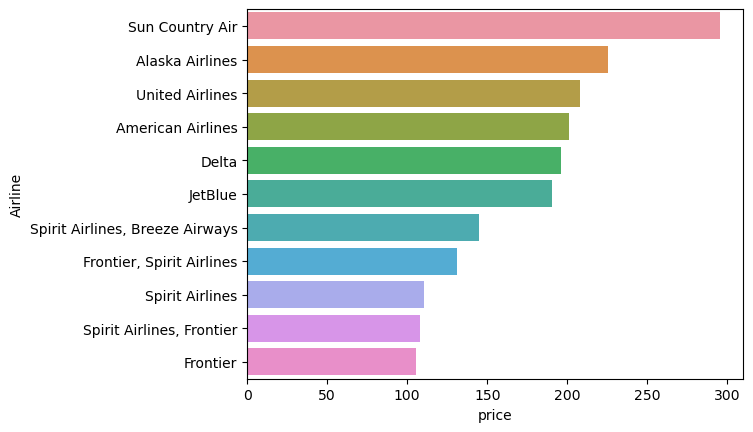

In [274]:
avg_price = df[['Airline','price']].groupby('Airline', as_index=False).mean()
sns.barplot(data=avg_price.sort_values(by='price',ascending=False), y='Airline', x='price')

frequency plot of Stops values

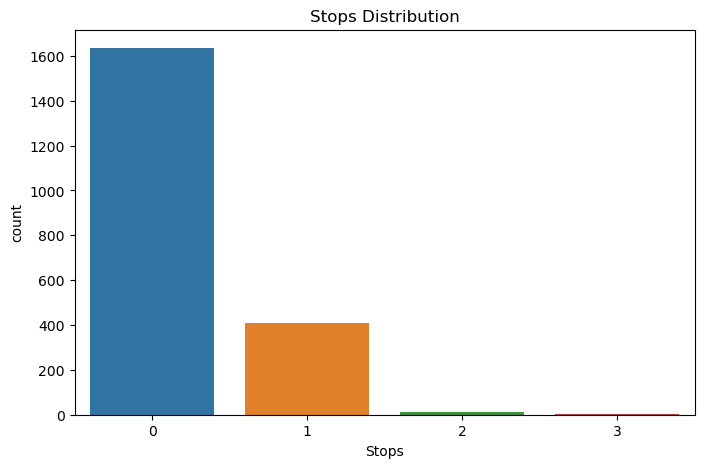

In [276]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Stops', data=df)
plt.title('Stops Distribution')
plt.show()

frequency plot of departure cities

<Axes: xlabel='departure', ylabel='count'>

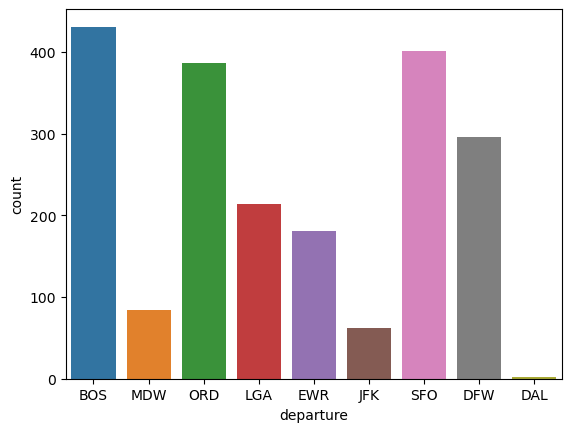

In [277]:
sns.countplot(data=df, x='departure')

distribution of flight price feature

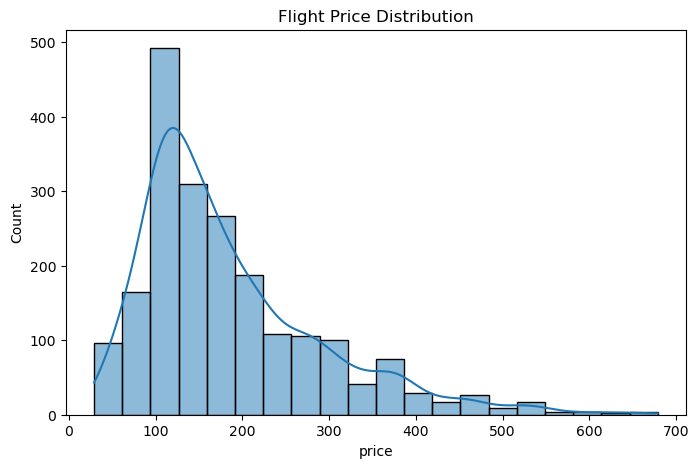

In [278]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Flight Price Distribution')
plt.show()

pie chart to view the composition of airlines 

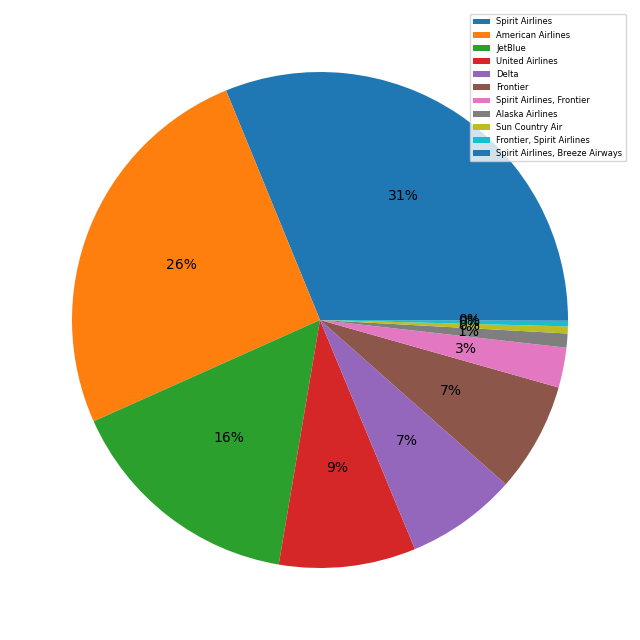

In [279]:
airline_counts = pd.Series({
    'United Airlines': 682,
    'American Airlines': 558,
    'Delta': 342,
    'Spirit Airlines': 195,
    'JetBlue': 158,
    'Frontier': 156,
    'Alaska Airlines': 57,
    'Frontier, Spirit Airlines': 20,
    'Sun Country Air': 10,
    'Spirit Airlines, Frontier': 8,
    'Spirit Airlines, Breeze Airways': 1
})

plt.figure(figsize=(8,9))
plt.pie(airline_counts, autopct='%.0f%%');
plt.legend(df['Airline'].unique(), fontsize=6, loc='upper right')

#unique values in each feature

In [357]:
df.nunique()

Airline                     11
Stops                        4
class_type                   6
Day                         30
Month                        1
Year                         1
Flight_Duration_minutes    277
departure                    9
arrival                      8
price                      280
dtype: int64

In [287]:
dfc=df.copy()
dfc

,Airline,Stops,class_type,Day,Month,Year,Flight_Duration_minutes,departure,arrival,price
0,Spirit Airlines,1,Economy,1,12,2023,764,BOS,ORD,82
1,American Airlines,0,Basic Economy,1,12,2023,168,BOS,ORD,89
2,JetBlue,0,Blue Basic,1,12,2023,181,BOS,ORD,109
3,United Airlines,0,Basic Economy,1,12,2023,177,BOS,ORD,106
4,JetBlue,0,Blue Basic,1,12,2023,180,BOS,ORD,119
...,...,...,...,...,...,...,...,...,...,...
2052,American Airlines,0,Main Cabin,30,12,2023,200,DFW,EWR,378
2053,American Airlines,0,Main Cabin,30,12,2023,197,DFW,EWR,378
2054,American Airlines,0,Main Cabin,30,12,2023,211,DFW,JFK,374
2055,United Airlines,0,Economy,30,12,2023,208,DFW,EWR,375


In [288]:
le = LabelEncoder()
dfc1 = dfc.apply(le.fit_transform)
del dfc1['Year']
del dfc1['Month']

In [289]:
dfc1

,Airline,Stops,class_type,Day,Flight_Duration_minutes,departure,arrival,price
0,6,1,2,0,242,0,6,38
1,1,0,0,0,0,0,6,43
2,5,0,1,0,7,0,6,60
3,10,0,0,0,3,0,6,57
4,5,0,1,0,6,0,6,69
...,...,...,...,...,...,...,...,...
2052,1,0,4,29,22,2,2,236
2053,1,0,4,29,19,2,2,236
2054,1,0,4,29,33,2,3,234
2055,10,0,2,29,30,2,2,235


# Correlation Matrix

In [290]:
dfc1.corr()

,Airline,Stops,class_type,Day,Flight_Duration_minutes,departure,arrival,price
Airline,1.000000,0.017943,-0.299488,0.036001,0.069576,0.144606,0.089892,0.034707
Stops,0.017943,1.000000,-0.030084,-0.008987,0.776442,0.098518,-0.002422,-0.181177
class_type,-0.299488,-0.030084,1.000000,0.309613,0.080786,0.041651,-0.124563,0.377292
Day,0.036001,-0.008987,0.309613,1.000000,-0.060448,-0.101996,0.032344,0.535734
Flight_Duration_minutes,0.069576,0.776442,0.080786,-0.060448,1.000000,0.559712,-0.193801,-0.077230
departure,0.144606,0.098518,0.041651,-0.101996,0.559712,1.000000,-0.295809,0.187125
arrival,0.089892,-0.002422,-0.124563,0.032344,-0.193801,-0.295809,1.000000,-0.090486
price,0.034707,-0.181177,0.377292,0.535734,-0.077230,0.187125,-0.090486,1.000000


for our target feature price, day,class_type,departure etc. are positively correlated

<Axes: >

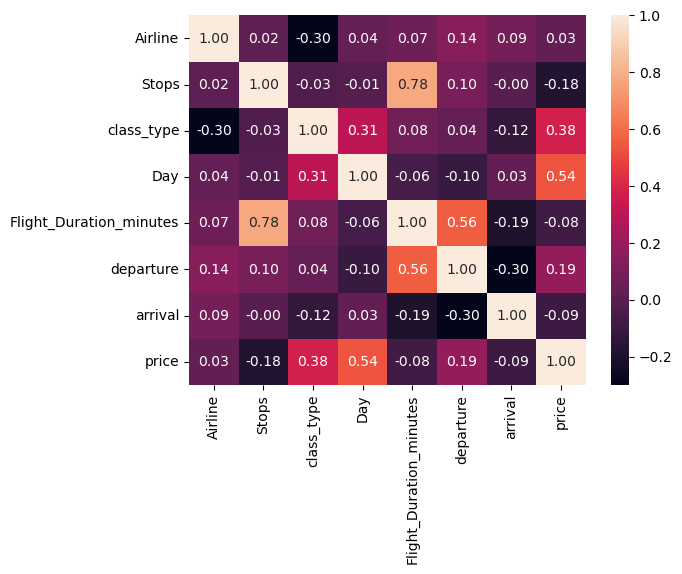

In [358]:
import seaborn as sns
sns.heatmap(dfc1.corr(),annot=True, fmt=".2f") 

Preparing data for training the model

In [293]:
x = df.drop('price',axis=1)
y = df['price']

In [294]:
y

0        82
1        89
2       109
3       106
4       119
       ... 
2052    378
2053    378
2054    374
2055    375
2056    374
Name: price, Length: 2057, dtype: int64

In [295]:
x

,Airline,Stops,class_type,Day,Month,Year,Flight_Duration_minutes,departure,arrival
0,Spirit Airlines,1,Economy,1,12,2023,764,BOS,ORD
1,American Airlines,0,Basic Economy,1,12,2023,168,BOS,ORD
2,JetBlue,0,Blue Basic,1,12,2023,181,BOS,ORD
3,United Airlines,0,Basic Economy,1,12,2023,177,BOS,ORD
4,JetBlue,0,Blue Basic,1,12,2023,180,BOS,ORD
...,...,...,...,...,...,...,...,...,...
2052,American Airlines,0,Main Cabin,30,12,2023,200,DFW,EWR
2053,American Airlines,0,Main Cabin,30,12,2023,197,DFW,EWR
2054,American Airlines,0,Main Cabin,30,12,2023,211,DFW,JFK
2055,United Airlines,0,Economy,30,12,2023,208,DFW,EWR


In [297]:
x_cat=x[['Airline','class_type','departure','arrival']]
x_num=x[['Stops','Day','Month','Flight_Duration_minutes']]

In [298]:
x_num

,Stops,Day,Month,Flight_Duration_minutes
0,1,1,12,764
1,0,1,12,168
2,0,1,12,181
3,0,1,12,177
4,0,1,12,180
...,...,...,...,...
2052,0,30,12,200
2053,0,30,12,197
2054,0,30,12,211
2055,0,30,12,208


# Label Encoding the Categorical Features

In [299]:
le = LabelEncoder()
x_cat = x_cat.apply(lambda col: le.fit_transform(col))
x_cat

,Airline,class_type,departure,arrival
0,6,2,0,6
1,1,0,0,6
2,5,1,0,6
3,10,0,0,6
4,5,1,0,6
...,...,...,...,...
2052,1,4,2,2
2053,1,4,2,2
2054,1,4,2,3
2055,10,2,2,2


In [300]:
x=pd.concat([x_cat,x_num],axis=1)
x

,Airline,class_type,departure,arrival,Stops,Day,Month,Flight_Duration_minutes
0,6,2,0,6,1,1,12,764
1,1,0,0,6,0,1,12,168
2,5,1,0,6,0,1,12,181
3,10,0,0,6,0,1,12,177
4,5,1,0,6,0,1,12,180
...,...,...,...,...,...,...,...,...
2052,1,4,2,2,0,30,12,200
2053,1,4,2,2,0,30,12,197
2054,1,4,2,3,0,30,12,211
2055,10,2,2,2,0,30,12,208


In [301]:
y

0        82
1        89
2       109
3       106
4       119
       ... 
2052    378
2053    378
2054    374
2055    375
2056    374
Name: price, Length: 2057, dtype: int64

# Training the Model

 Splitting the dataset into training & testing data

In [342]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=100)

In [363]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1645, 8)
(1645,)
(412, 8)
(412,)


In [343]:
x_train.head()

,Airline,class_type,departure,arrival,Stops,Day,Month,Flight_Duration_minutes
728,1,0,7,7,0,20,12,296
1705,5,1,8,0,0,24,12,339
40,10,0,0,6,0,3,12,177
152,2,0,0,6,0,11,12,182
1414,5,1,8,0,0,5,12,331


In [344]:
x_test.head()

,Airline,class_type,departure,arrival,Stops,Day,Month,Flight_Duration_minutes
957,10,0,3,1,0,4,12,248
2009,6,2,2,2,1,27,12,513
1128,10,0,3,1,0,16,12,248
1440,0,5,8,0,0,6,12,340
423,2,0,0,6,0,30,12,193


In [345]:
y_train.head()

728     194
1705    239
40      181
152     119
1414    112
Name: price, dtype: int64

In [346]:
y_test.head()

957     211
2009    112
1128     99
1440    112
423     179
Name: price, dtype: int64

# Decision Tree Regressor

In [350]:
import sklearn.metrics as metrics
reg2 = DecisionTreeRegressor()
reg2.fit(x_train, y_train)
y_predi = reg2.predict(x_test)
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_predi))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_predi))
print('R2 score: ',metrics.r2_score(y_test,y_predi))

Mean absolute error:  29.364077669902912
Mean squared error:  2176.341154261057
R2 score:  0.7951991013204698


# Random Forest Regressor

In [351]:
reg3 = RandomForestRegressor()
reg3.fit(x_train, y_train)
y_predi = reg3.predict(x_test)
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_predi))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_predi))
print('R2 score: ',metrics.r2_score(y_test,y_predi))

Mean absolute error:  24.709656678609957
Mean squared error:  1354.8197834357472
R2 score:  0.8725069786723499


# KNN Regressor

In [352]:
reg4 = KNeighborsRegressor()
reg4.fit(x_train, y_train)
y_predi = reg4.predict(x_test)
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_predi))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_predi))
print('R2 score: ',metrics.r2_score(y_test,y_predi))

Mean absolute error:  36.886407766990295
Mean squared error:  2980.2871844660194
R2 score:  0.7195451216337598


# Support Vector Regressor

In [359]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create and train the Support Vector Regressor
reg5 = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
reg5.fit(x_train, y_train)

# Make predictions
y_predic = reg5.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_predic)
print(f"Mean Squared Error: {mse}")
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_predic))
print("r2 score ", reg5.score(x_test,y_test))

Mean Squared Error: 3187.176011415595
Mean absolute error:  38.28735075589123
r2 score  0.7000761989407028


Accuracy Scores for the Models

In [362]:
dt_acc=reg2.score(x_test,y_test)
print(f'The accuracy for Decision Tree Regressor model is {dt_acc}')

rf_acc=reg3.score(x_test,y_test)
print(f'The accuracy for Random Forest Regressor model is {rf_acc}')

kn_acc=reg4.score(x_test,y_test)
print(f'The accuracy for KNN Regressor model is {kn_acc}')

sv_acc=reg5.score(x_test,y_test)
print(f'The accuracy for Support Vector Regressor model is {sv_acc}')


The accuracy for Decision Tree Regressor model is 0.7951991013204698
The accuracy for Random Forest Regressor model is 0.8725069786723499
The accuracy for KNN Regressor model is 0.7195451216337598
The accuracy for Support Vector Regressor model is 0.7000761989407028


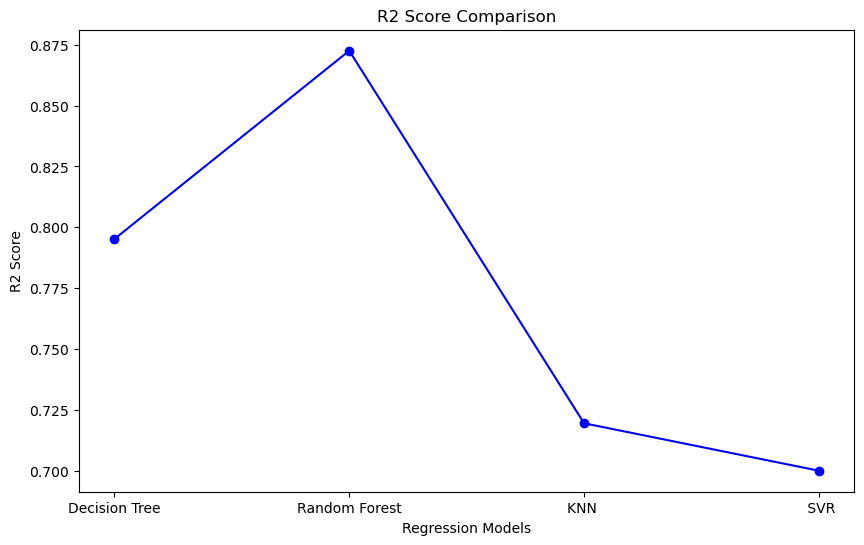

In [361]:
r2_scores=[dt_acc,rf_acc,kn_acc,sv_acc]
models = ['Decision Tree','Random Forest' ,'KNN ', ' SVR']
plt.figure(figsize=(10, 6))
plt.plot(models, r2_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Regression Models')
plt.ylabel('R2 Score')
plt.title('R2 Score Comparison')
plt.show()